In [1]:
!pip install seaborn --quiet
!pip install scikit-learn --quiet
#!pip install tensorflow --quiet
!pip install keras --quiet
!pip install matplotlib --quiet
!pip install pandas --quiet
!pip install numpy --quiet
!pip install torch --quiet
!pip install imbalanced-learn --quiet


In [2]:
# Importa el módulo 'drive' desde la librería 'google.colab' para interactuar con Google Drive
from google.colab import drive

# Monta el sistema de archivos de Google Drive en la ruta especificada '/content/drive/'
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Importa el módulo 'sys' para interactuar con el sistema, como las rutas de búsqueda de módulos
import sys

# Agrega la ruta especificada al listado de directorios donde Python busca módulos
# Esto permite importar módulos personalizados desde Google Drive, en este caso, desde la carpeta 'ML_Aprendizaje_Profundo/2025-espectro-banano'
sys.path.append('/content/drive/MyDrive/ML_Aprendizaje_Profundo/2025-espectro-banano/')

# Importa el módulo 'os' para interactuar con el sistema operativo, como manejo de archivos y directorios
import os

# Importa la librería 'pandas' con el alias 'pd' para manipulación y análisis de datos en estructuras como DataFrames
import pandas as pd

# Importa la librería 'numpy' con el alias 'np' para operaciones numéricas y manejo de arreglos
import numpy as np

# Importa un módulo personalizado 'dataFunction3' con el alias 'datF', probablemente con funciones definidas por el usuario
import dataFunction3 as datF

# Importa un módulo personalizado 'dataFunction3' con el alias 'datF', probablemente con funciones definidas por el usuario
import dataFunction4 as datF4

# Importa 'pyplot' de la librería 'matplotlib' con el alias 'plt' para crear visualizaciones como gráficos
import matplotlib.pyplot as plt

# Importa la librería 'seaborn' con el alias 'sns' para visualizaciones estadísticas avanzadas y estilizadas
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.manifold import TSNE

# Aplica el tema predeterminado de 'seaborn' para estilizar las visualizaciones generadas
sns.set_theme()

In [4]:
# Nombre del archivo CSV a leer
file = 'newdatos-Junio14-dataset.csv'

# Ruta base en Google Drive donde está el archivo
path = r"/content/drive/MyDrive/ML_Aprendizaje_Profundo/2025-espectro-banano/"

# Reemplaza barras invertidas por diagonales (redundante aquí)
path = path.replace('\\', '/')

# Combina la ruta y el nombre del archivo
file = os.path.join(path, file)

# Lee el CSV con separador ';' y lo carga en un DataFrame
df = pd.read_csv(file, sep=';')

In [5]:
# Recibe el DataFrame 'df' como parámetro para identificar o procesar las clases/categorías únicas en los datos
datF.clasesDiferentes(df)


Clases diferentes en la columna dpi:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Clases diferentes en la columna Sana:
[ 1  0 -1]
Donde:

1 es Sana
0 es Fusarium
-1 es E_Hidrico

Clases diferentes en la columna Tratamiento:
['Control' 'Ralstonia' 'Fusarium' 'E_Hidrico' 'Ral_Fus' 'Ral_EH'
 'Fus_EH_Ral' 'Fus_EH']



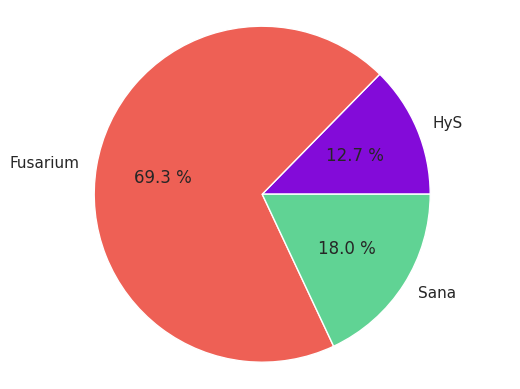

In [6]:
# visualiza la distribución de los datos por la columna "Sana" y se cuenta cuántas veces aparece cada clase usando la columna "dpi"
datF.pie_Sanas(df)

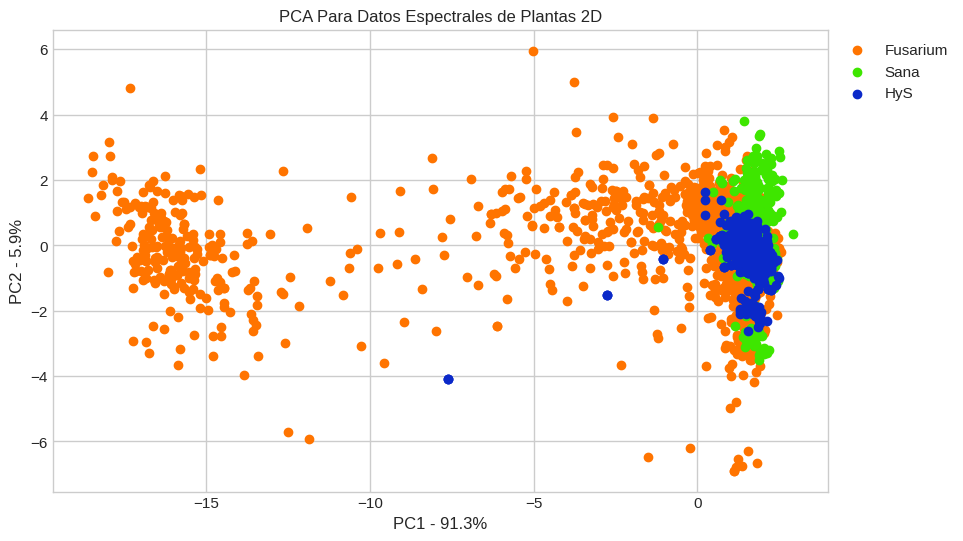

In [7]:
# Genera un gráfico 2D de los datos transformados por PCA
datF.plot_datos_PCA2d(df)

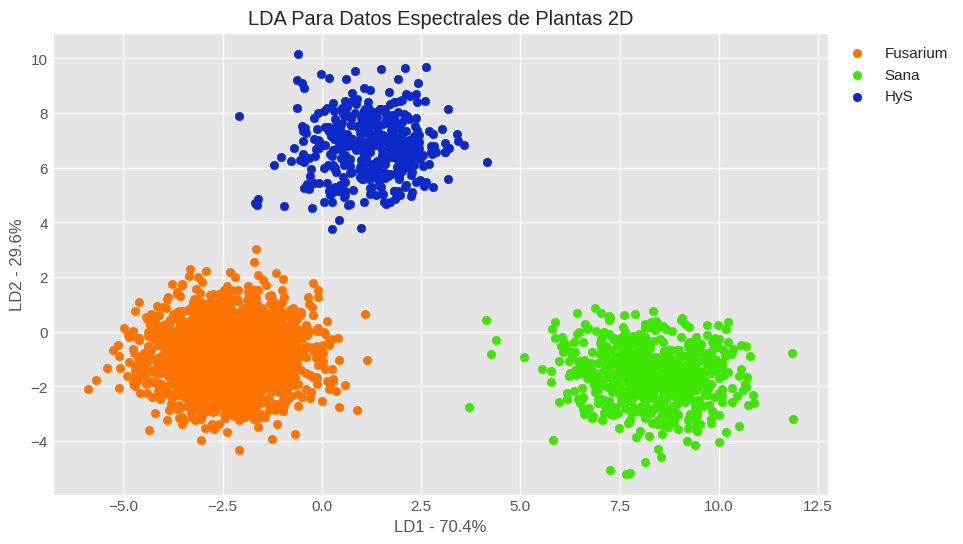

In [8]:
# Genera un gráfico 2D de los datos transformados por Análisis Discriminante Lineal (LDA)
datF.plot_datos_LDA2d(df)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


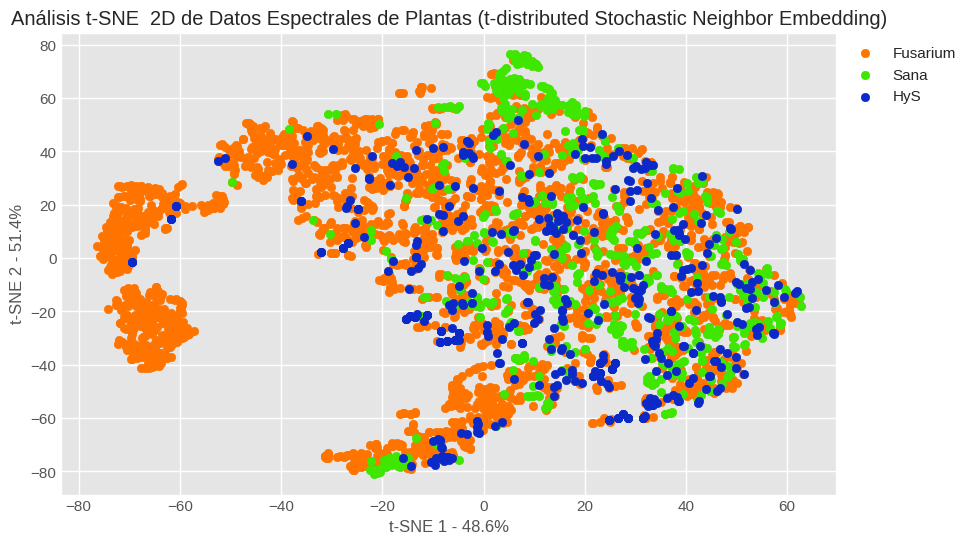

In [9]:
# Genera un gráfico 2D de los datos transformados por t-SNE preservando la estructura local
datF.plot_datos_tSNE(df)

In [10]:
print(pd.crosstab(df['Tratamiento'], df['Sana']))

Sana          -1    0    1
Tratamiento               
Control        0    0  461
E_Hidrico    448    0   30
Fus_EH         0  432    0
Fus_EH_Ral     0  412   30
Fusarium       0  418   30
Ral_EH         0  406   30
Ral_Fus        0  385   27
Ralstonia      0  399   29


In [11]:
# Eliminar Tratamiento y la columna Sana original
'''
Razón: La tabla cruzada muestra una fuerte correlación entre Tratamiento y Sana
(por ejemplo, Control y Ralstonia son siempre Sana = 1, Fus_EH es siempre Fusarium = 0).
Incluir Tratamiento causaría data leakage
 '''
df = df.drop(['Tratamiento'], axis=1)

In [12]:
''' # Modifica la columna 'Sana' para tener solo dos clases: 1 (sana) y 0 (no sana)
df['Sana'] = df['Sana'].apply(lambda x: 1 if x == 1 else 0)

# Verifica la nueva distribución de clases
print("Nueva distribución de clases en 'Sana':")
print(df['Sana'].value_counts()) '''

' # Modifica la columna \'Sana\' para tener solo dos clases: 1 (sana) y 0 (no sana)\ndf[\'Sana\'] = df[\'Sana\'].apply(lambda x: 1 if x == 1 else 0)\n\n# Verifica la nueva distribución de clases\nprint("Nueva distribución de clases en \'Sana\':")\nprint(df[\'Sana\'].value_counts()) '

In [13]:
print("Nueva distribución de clases en 'Sana':")
print(df['Sana'].value_counts())

Nueva distribución de clases en 'Sana':
Sana
 0    2452
 1     637
-1     448
Name: count, dtype: int64


In [14]:
# 1 = Sana, 0 = No Sana (Fusarium y E_Hidrico combinados)
df['Sana'] = df['Sana'].apply(lambda x: 1 if x == 1 else 0)

# Confirmar distribución
print("Nueva distribución binaria en 'Sana':")
print(df['Sana'].value_counts())

Nueva distribución binaria en 'Sana':
Sana
0    2900
1     637
Name: count, dtype: int64


In [15]:
# Separar características y variable objetivo
X = df.drop('Sana', axis=1)  # Incluye dpi y columnas 350 a 2500
y = df['Sana']

In [16]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=87, stratify=y
)

print(f"train size: {y_train.shape[0]}\n test size: {y_test.shape[0]}")

train size: 2829
 test size: 708


In [17]:
y_train_mapped = y_train.astype(int)
y_test_mapped = y_test.astype(int)

In [18]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes=2):  # <== Cambia a 2
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [19]:
# Función MixUp
def mixup_data(x, y, alpha=1.0):
    '''Genera datos y etiquetas mezcladas con MixUp'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
# Función de entrenamiento con MixUp
def entrenar_mlp_mixup(X_train, y_train, X_test, y_test, epochs=50, lr=0.001, alpha=1.0):
    input_dim = X_train.shape[1]
    model = MLP(input_dim, num_classes=2).cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss(reduction='none')

    if isinstance(X_train, pd.DataFrame):
        X_train = torch.FloatTensor(X_train.values).cuda()
    else:
        X_train = torch.FloatTensor(X_train).cuda()

    y_train = torch.LongTensor(y_train.values).cuda()

    if isinstance(X_test, pd.DataFrame):
        X_test = torch.FloatTensor(X_test.values).cuda()
    else:
        X_test = torch.FloatTensor(X_test).cuda()

    y_test = torch.LongTensor(y_test.values).cuda()

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        mixed_x, y_a, y_b, lam = mixup_data(X_train, y_train, alpha)
        outputs = model(mixed_x)

        loss = lam * criterion(outputs, y_a) + (1 - lam) * criterion(outputs, y_b)
        loss = loss.mean()

        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                test_outputs = model(X_test)
                preds = torch.argmax(test_outputs, dim=1)
                acc = (preds == y_test).float().mean()
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f} - Test Acc: {acc.item():.4f}")

    # Evaluación final
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        preds = torch.argmax(test_outputs, dim=1).cpu().numpy()
        y_test_cpu = y_test.cpu().numpy()

        cm = confusion_matrix(y_test_cpu, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Sana", "Sana"])
        disp.plot(cmap="Blues")
        plt.title("Matriz de Confusión - Test")
        plt.show()

        acc_final = accuracy_score(y_test_cpu, preds)
        print(f"\nAccuracy final en Test: {acc_final:.4f}")


=== Entrenamiento SOLO MixUp ===
Epoch 10/200 - Loss: 0.4688 - Test Acc: 0.8192
Epoch 20/200 - Loss: 0.4545 - Test Acc: 0.8192
Epoch 30/200 - Loss: 0.4554 - Test Acc: 0.8192
Epoch 40/200 - Loss: 0.4411 - Test Acc: 0.8192
Epoch 50/200 - Loss: 0.4620 - Test Acc: 0.8192
Epoch 60/200 - Loss: 0.4397 - Test Acc: 0.8192
Epoch 70/200 - Loss: 0.4580 - Test Acc: 0.8192
Epoch 80/200 - Loss: 0.4252 - Test Acc: 0.8192
Epoch 90/200 - Loss: 0.4303 - Test Acc: 0.8192
Epoch 100/200 - Loss: 0.4239 - Test Acc: 0.8192
Epoch 110/200 - Loss: 0.4481 - Test Acc: 0.8192
Epoch 120/200 - Loss: 0.4494 - Test Acc: 0.8192
Epoch 130/200 - Loss: 0.4129 - Test Acc: 0.8192
Epoch 140/200 - Loss: 0.4380 - Test Acc: 0.8192
Epoch 150/200 - Loss: 0.4206 - Test Acc: 0.8234
Epoch 160/200 - Loss: 0.4380 - Test Acc: 0.8192
Epoch 170/200 - Loss: 0.4016 - Test Acc: 0.8192
Epoch 180/200 - Loss: 0.4462 - Test Acc: 0.8249
Epoch 190/200 - Loss: 0.4236 - Test Acc: 0.8192
Epoch 200/200 - Loss: 0.4132 - Test Acc: 0.8192


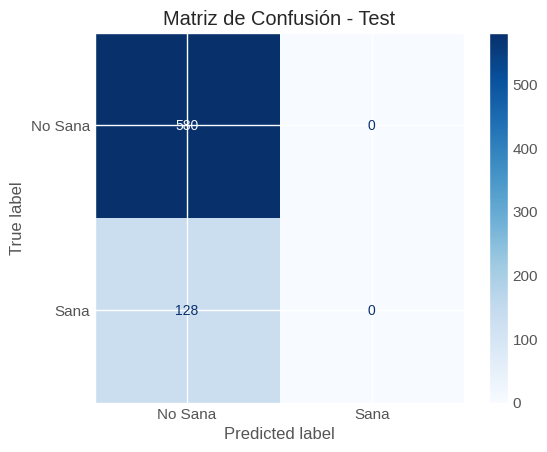


Accuracy final en Test: 0.8192


In [21]:
# Solo MixUp
print("\n=== Entrenamiento SOLO MixUp ===")
entrenar_mlp_mixup(X_train, y_train_mapped, X_test, y_test_mapped, epochs=200, lr=0.001, alpha=0.4)



=== Entrenamiento MixUp + SMOTE ===
Epoch 10/200 - Loss: 0.6616 - Test Acc: 0.5749
Epoch 20/200 - Loss: 0.6253 - Test Acc: 0.6398
Epoch 30/200 - Loss: 0.5999 - Test Acc: 0.5226
Epoch 40/200 - Loss: 0.6397 - Test Acc: 0.5042
Epoch 50/200 - Loss: 0.6078 - Test Acc: 0.6045
Epoch 60/200 - Loss: 0.5743 - Test Acc: 0.5946
Epoch 70/200 - Loss: 0.5758 - Test Acc: 0.6653
Epoch 80/200 - Loss: 0.5681 - Test Acc: 0.5819
Epoch 90/200 - Loss: 0.6369 - Test Acc: 0.6243
Epoch 100/200 - Loss: 0.5890 - Test Acc: 0.5720
Epoch 110/200 - Loss: 0.5506 - Test Acc: 0.7006
Epoch 120/200 - Loss: 0.5860 - Test Acc: 0.6102
Epoch 130/200 - Loss: 0.6231 - Test Acc: 0.6243
Epoch 140/200 - Loss: 0.5678 - Test Acc: 0.5946
Epoch 150/200 - Loss: 0.5480 - Test Acc: 0.6469
Epoch 160/200 - Loss: 0.5945 - Test Acc: 0.6427
Epoch 170/200 - Loss: 0.6345 - Test Acc: 0.6893
Epoch 180/200 - Loss: 0.5176 - Test Acc: 0.6610
Epoch 190/200 - Loss: 0.6187 - Test Acc: 0.6568
Epoch 200/200 - Loss: 0.6170 - Test Acc: 0.6540


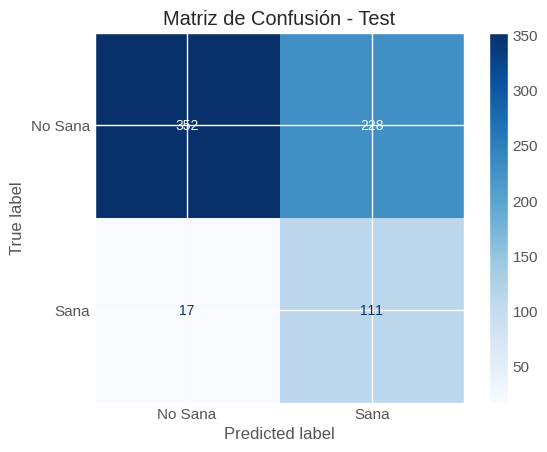


Accuracy final en Test: 0.6540


In [22]:
# MixUp + SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_mapped)

print("\n=== Entrenamiento MixUp + SMOTE ===")
entrenar_mlp_mixup(X_train_smote, y_train_smote, X_test, y_test_mapped, epochs=200, lr=0.001, alpha=0.4)


=== Entrenamiento MixUp + Simulación DeepSMOTE ===
Epoch 10/200 - Loss: 0.6410 - Test Acc: 0.6610
Epoch 20/200 - Loss: 0.6695 - Test Acc: 0.5381
Epoch 30/200 - Loss: 0.6386 - Test Acc: 0.5325
Epoch 40/200 - Loss: 0.6218 - Test Acc: 0.5169
Epoch 50/200 - Loss: 0.6015 - Test Acc: 0.4831
Epoch 60/200 - Loss: 0.6208 - Test Acc: 0.5734
Epoch 70/200 - Loss: 0.5765 - Test Acc: 0.6384
Epoch 80/200 - Loss: 0.5758 - Test Acc: 0.6624
Epoch 90/200 - Loss: 0.5682 - Test Acc: 0.6186
Epoch 100/200 - Loss: 0.6270 - Test Acc: 0.5847
Epoch 110/200 - Loss: 0.5754 - Test Acc: 0.5819
Epoch 120/200 - Loss: 0.5568 - Test Acc: 0.6031
Epoch 130/200 - Loss: 0.5949 - Test Acc: 0.6299
Epoch 140/200 - Loss: 0.6132 - Test Acc: 0.7147
Epoch 150/200 - Loss: 0.6286 - Test Acc: 0.6667
Epoch 160/200 - Loss: 0.6013 - Test Acc: 0.5960
Epoch 170/200 - Loss: 0.6333 - Test Acc: 0.6624
Epoch 180/200 - Loss: 0.5745 - Test Acc: 0.6441
Epoch 190/200 - Loss: 0.5207 - Test Acc: 0.6864
Epoch 200/200 - Loss: 0.5256 - Test Acc: 0.73

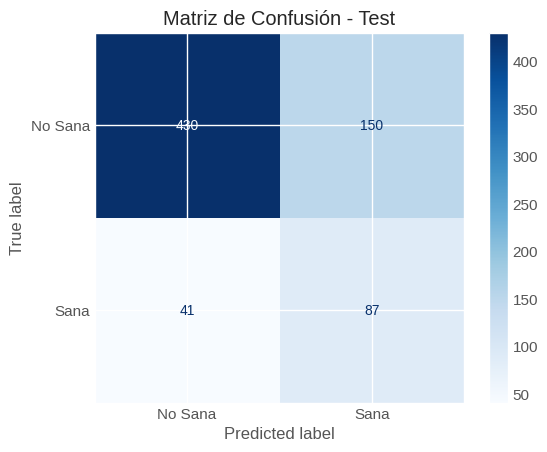


Accuracy final en Test: 0.7302


In [23]:
# MixUp + Simulación DeepSMOTE (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1])
X_train_projected = pca.fit_transform(X_train_smote)
X_train_reconstructed = pca.inverse_transform(X_train_projected)

print("\n=== Entrenamiento MixUp + Simulación DeepSMOTE ===")
entrenar_mlp_mixup(X_train_reconstructed, y_train_smote, X_test, y_test_mapped, epochs=200, lr=0.001, alpha=0.4)